In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp "/content/gdrive/My Drive/Covid-19 Dataset/keras-covid-19.zip" "/content/"

In [0]:
!unzip keras-covid-19.zip -d "/content/dataset"

Archive:  keras-covid-19.zip
   creating: /content/dataset/keras-covid-19/
  inflating: /content/dataset/keras-covid-19/build_covid_dataset.py  
  inflating: /content/dataset/keras-covid-19/covid19.model  
   creating: /content/dataset/keras-covid-19/dataset/
   creating: /content/dataset/keras-covid-19/dataset/covid/
  inflating: /content/dataset/keras-covid-19/dataset/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: /content/dataset/keras-covid-19/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: /content/dataset/keras-covid-19/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: /content/dataset/keras-covid-19/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: /content/dataset/keras-covid-19/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: /content/dataset/keras-covid-19/dataset/covid/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: /content/dataset/keras-covid-19/datas

In [0]:
!cp  -r "/content/dataset/keras-covid-19/dataset" "/content/main/"

In [0]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt 
import sklearn
import imutils 
import os 
import numpy as np
from IPython.display import Image, display
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import  np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers import Conv2D,MaxPool2D,ZeroPadding2D,Convolution2D,MaxPooling2D
from keras import backend as K
from keras.layers import BatchNormalization
from keras.optimizers import SGD,RMSprop
from keras.optimizers.schedules import ExponentialDecay

ModuleNotFoundError: ignored

In [0]:
covid_infected=os.listdir("/content/main/dataset/covid")
normal_lungs=os.listdir("/content/main/dataset/normal")
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

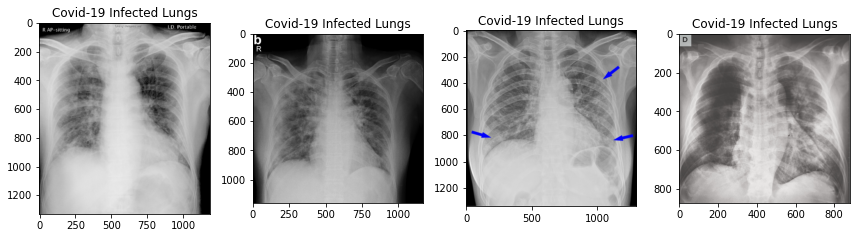

In [0]:
plt.figure(figsize=(12,12))
for i in range(4):
    plt.subplot(1,4,i+1)
    img=cv2.imread('/content/main/dataset/covid' + "/" + covid_infected[i])
    plt.imshow(img)
    plt.title('Covid-19 Infected Lungs')
    plt.tight_layout()
plt.show()

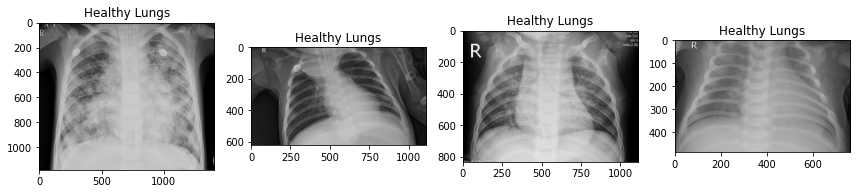

In [0]:
plt.figure(figsize=(12,12))
for i in range(4):
    plt.subplot(1,4,i+1)
    img=cv2.imread('/content/main/dataset/normal' + "/" + normal_lungs[i])
    plt.imshow(img)
    plt.title('Healthy Lungs')
    plt.tight_layout()
plt.show()

In [0]:
#Preparing the Train and test data
covid=0
normal=0
for i in os.listdir("/content/main/dataset/covid"):
    covid=covid+1
for i in os.listdir("/content/main/dataset/normal"):
    normal=normal+1
print("Covid-19 infected :",covid)
print("Healthy Lungs :",normal)



Covid-19 infected : 25
Healthy Lungs : 25


In [0]:
data=[]
labels=[]
for img in covid_infected:
    try:
        img_read=plt.imread('/content/main/dataset/covid' + "/" + img)
        img_resize=cv2.resize(img_read,(224,224))
        img_gray=cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
        img_array=img_to_array(img_gray)
        data.append(img_array)
        labels.append(1)
    except:
        None
for img in normal_lungs:
    try:
        img_read=plt.imread('/content/main/dataset/normal' + "/" + img)
        img_resize=cv2.resize(img_read,(224,224))
        img_gray=cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
        img_array=img_to_array(img_gray)
        data.append(img_array)
        labels.append(0)
    except:
        None



In [0]:
data[0].shape

(224, 224, 1)

In [0]:
image_data=np.array(data)
labels=np.array(labels)

In [0]:
idx=np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data=image_data[idx]
labels=labels[idx]

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(image_data,labels,test_size=0.4, random_state=101)

In [0]:
y_train=np_utils.to_categorical(y_train,num_classes=2)
y_test=np_utils.to_categorical(y_test,num_classes=2)

In [0]:
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(224,224,1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer=RMSprop(),metrics=['accuracy'], loss="categorical_crossentropy")


In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 52, 52, 128)      

In [0]:
history=model.fit(X_train,y_train,epochs=200,batch_size=32, validation_data=(X_test,y_test))

Train on 15 samples, validate on 11 samples
Epoch 1/200
15/15 [==============================] - 1s 50ms/step - loss: 0.3062 - accuracy: 0.8000 - val_loss: 43.5223 - val_accuracy: 0.9091
Epoch 2/200
15/15 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 36.0456 - val_accuracy: 0.9091
Epoch 3/200
15/15 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 31.7051 - val_accuracy: 0.9091
Epoch 4/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 28.7277 - val_accuracy: 0.9091
Epoch 5/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 26.4531 - val_accuracy: 0.9091
Epoch 6/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 24.6524 - val_accuracy: 0.9091
Epoch 7/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0000e+0

In [0]:
model.evaluate(X_test,y_test)

11/11 [==============================] - 0s 3ms/step


[0.9766956567764282, 0.9090909361839294]

Text(0.5, 1.0, 'Accuracy Curves')

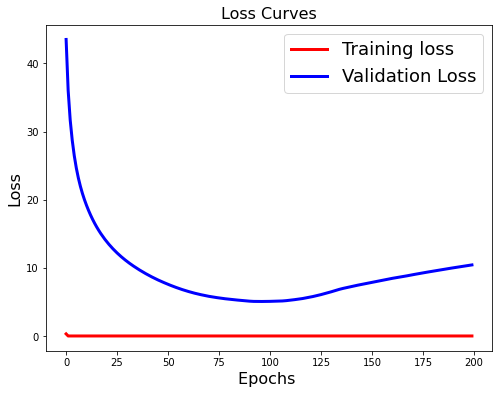

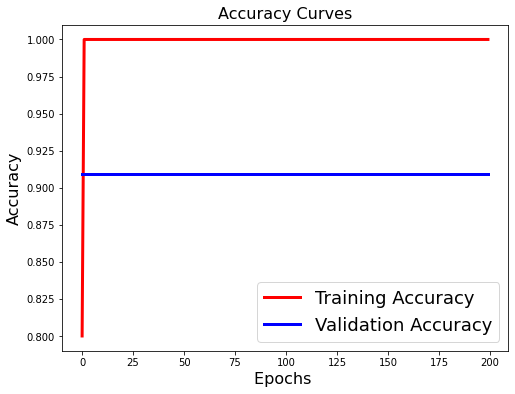

In [0]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



In [0]:
from sklearn.metrics import classification_report,accuracy_score

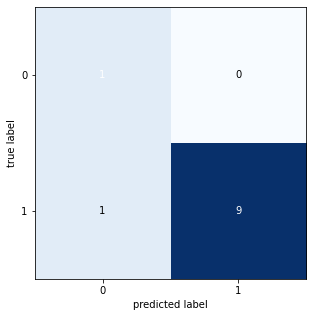

In [0]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [0]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

Accuracy : 0.9090909090909091
Classification report                precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.90      0.95        10

   micro avg       0.91      0.91      0.91        11
   macro avg       0.75      0.95      0.81        11
weighted avg       0.95      0.91      0.92        11
 samples avg       0.91      0.91      0.91        11



In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(X_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(X_test, y_test, batch_size = 64, shuffle = False)


In [0]:
chanDim=-1
model_aug=Sequential()
model_aug.add(Conv2D(32,(3,3), activation='relu',input_shape=(224,224,1)))
model_aug.add(MaxPooling2D((2,2), strides=(2,2)))
model_aug.add(BatchNormalization(axis = chanDim))
model_aug.add(Conv2D(64, (3, 3), activation='relu'))
model_aug.add(MaxPooling2D((2,2), strides=(2,2)))
model_aug.add(BatchNormalization(axis = chanDim))
model_aug.add(Conv2D(128, (3, 3), activation='relu'))
model_aug.add(MaxPooling2D((2,2), strides=(2,2)))
model_aug.add(BatchNormalization(axis = chanDim))
model_aug.add(Flatten())
model_aug.add(Dense(256,activation='relu'))
model_aug.add(Dense(128, activation="relu"))
model_aug.add(Dense(2, activation='softmax'))
from keras import optimizers
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model_aug.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])
h_aug = model_aug.fit_generator(train_generator, steps_per_epoch = 32, epochs = 20, validation_data=(X_test,y_test))


Epoch 1/20
32/32 [==============================] - 5s 144ms/step - loss: 1.8408 - accuracy: 0.9333 - val_loss: 1263.2788 - val_accuracy: 0.9091
Epoch 2/20
32/32 [==============================] - 4s 112ms/step - loss: 1.0825 - accuracy: 0.9833 - val_loss: 2027.0288 - val_accuracy: 0.9091
Epoch 3/20
32/32 [==============================] - 4s 111ms/step - loss: 0.8223 - accuracy: 0.9812 - val_loss: 6233.3608 - val_accuracy: 0.9091
Epoch 4/20
32/32 [==============================] - 3s 106ms/step - loss: 0.2345 - accuracy: 0.9917 - val_loss: 10184.1367 - val_accuracy: 0.9091
Epoch 5/20
32/32 [==============================] - 4s 112ms/step - loss: 0.2846 - accuracy: 0.9854 - val_loss: 14794.8281 - val_accuracy: 0.9091
Epoch 6/20
32/32 [==============================] - 3s 108ms/step - loss: 0.9587 - accuracy: 0.9937 - val_loss: 18267.7129 - val_accuracy: 0.9091
Epoch 7/20
32/32 [==============================] - 4s 117ms/step - loss: 0.0278 - accuracy: 0.9979 - val_loss: 15901.7969 - va

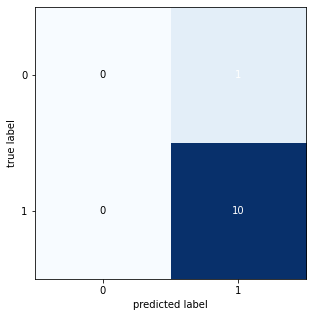

In [0]:
from sklearn.metrics import confusion_matrix
pred = model_aug.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [0]:
y_pred=model_aug.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

Accuracy : 0.9090909090909091
Classification report                precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.91      1.00      0.95        10

   micro avg       0.91      0.91      0.91        11
   macro avg       0.45      0.50      0.48        11
weighted avg       0.83      0.91      0.87        11
 samples avg       0.91      0.91      0.91        11



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Curves')

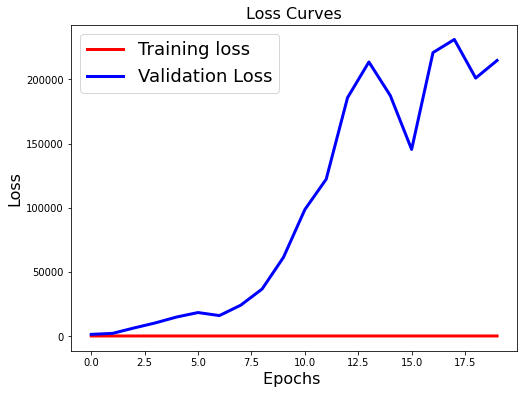

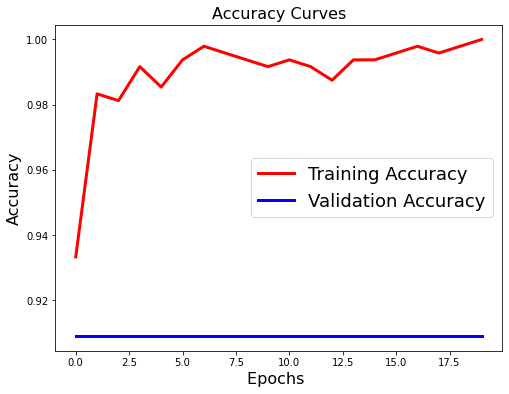

In [0]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(h_aug.history['loss'],'r',linewidth=3.0)
plt.plot(h_aug.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(h_aug.history['accuracy'],'r',linewidth=3.0)
plt.plot(h_aug.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



Introduction of Drop out

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 54, 54, 64)      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Curves')

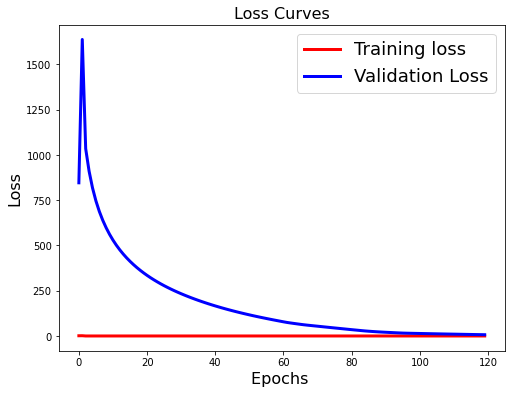

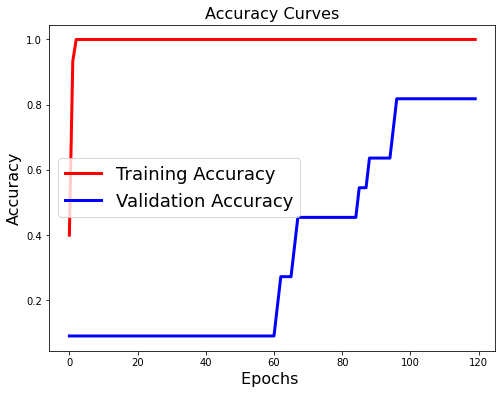

In [0]:
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(224,224,1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer=RMSprop(),metrics=['accuracy'], loss="categorical_crossentropy")
model.summary()

history=model.fit(X_train,y_train,epochs=120,batch_size=32, validation_data=(X_test,y_test))

y_pred=model_aug.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



WITHOUT BATCH NORMALIZATION

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 86528)           

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Curves')

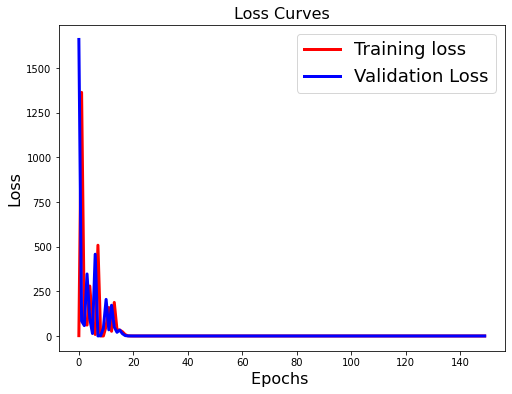

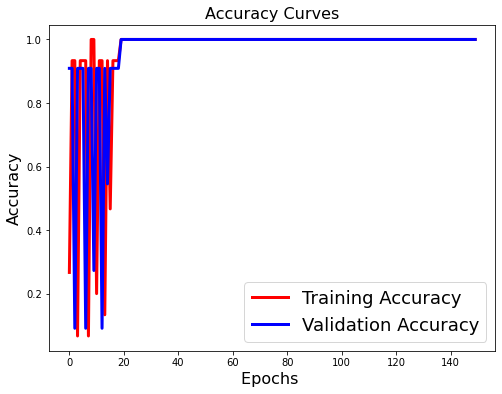

In [0]:
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(224,224,1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
#model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
#model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
#model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer=RMSprop(),metrics=['accuracy'], loss="categorical_crossentropy")
model.summary()

history=model.fit(X_train,y_train,epochs=150,batch_size=32, validation_data=(X_test,y_test))

y_pred=model_aug.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_46 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_47 (Batc (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 52, 52, 128)     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Curves')

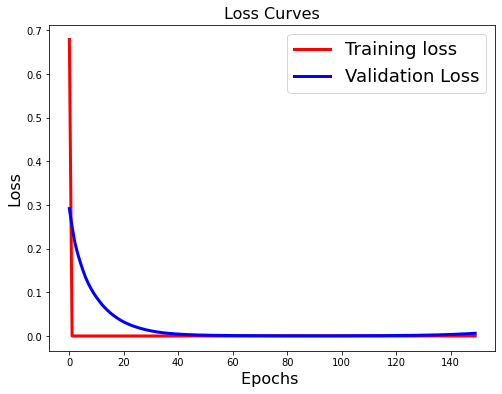

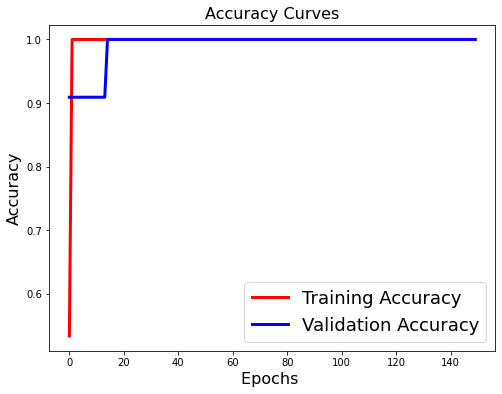

In [0]:
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(224,224,1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.0, nesterov=False),metrics=['accuracy'], loss="categorical_crossentropy")
model.summary()

history=model.fit(X_train,y_train,epochs=150,batch_size=32, validation_data=(X_test,y_test))

y_pred=model_aug.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_50 (Batc (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 52, 52, 128)     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Curves')

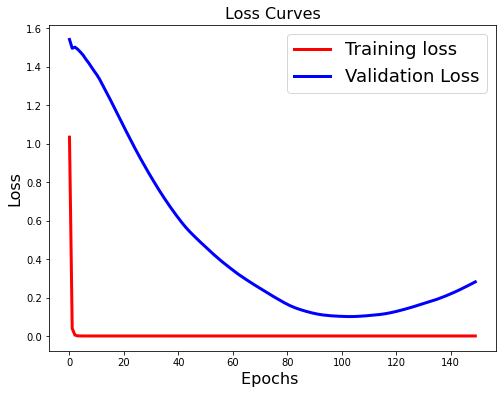

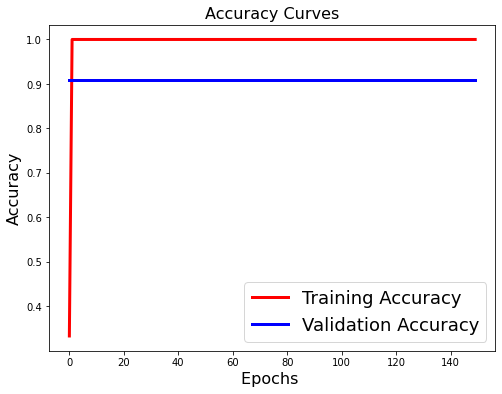

In [0]:
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(224,224,1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9, nesterov=False),metrics=['accuracy'], loss="categorical_crossentropy")
model.summary()

history=model.fit(X_train,y_train,epochs=150,batch_size=32, validation_data=(X_test,y_test))

y_pred=model_aug.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_52 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_53 (Batc (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 52, 52, 128)     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Curves')

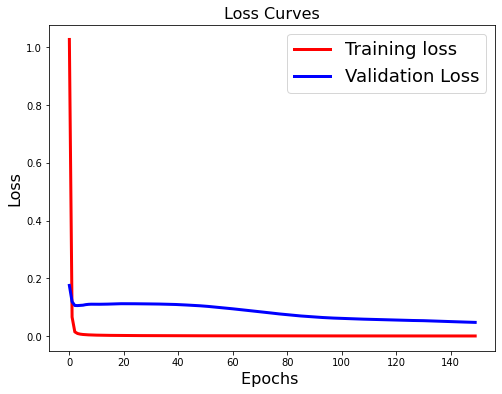

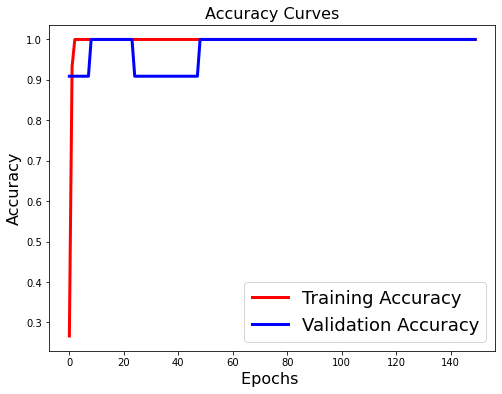

In [0]:
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(224,224,1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.0, nesterov=False),metrics=['accuracy'], loss="categorical_crossentropy")
model.summary()

history=model.fit(X_train,y_train,epochs=150,batch_size=32, validation_data=(X_test,y_test))

y_pred=model_aug.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_58 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_59 (Batc (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 52, 52, 128)     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Curves')

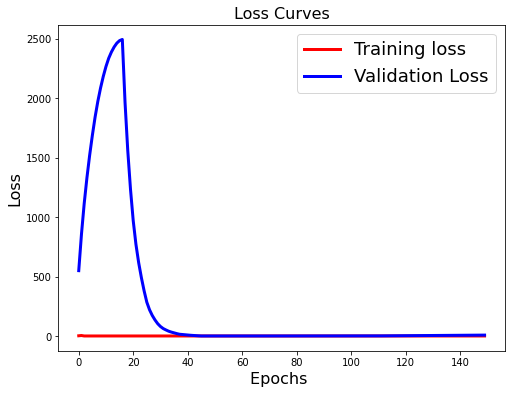

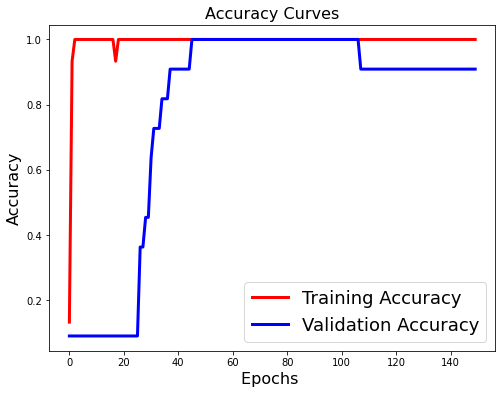

In [0]:
from keras.optimizers import Adam
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(224,224,1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False),metrics=['accuracy'], loss="categorical_crossentropy")
model.summary()

history=model.fit(X_train,y_train,epochs=150,batch_size=32, validation_data=(X_test,y_test))

y_pred=model_aug.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_70 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_71 (Batc (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 52, 52, 128)     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Curves')

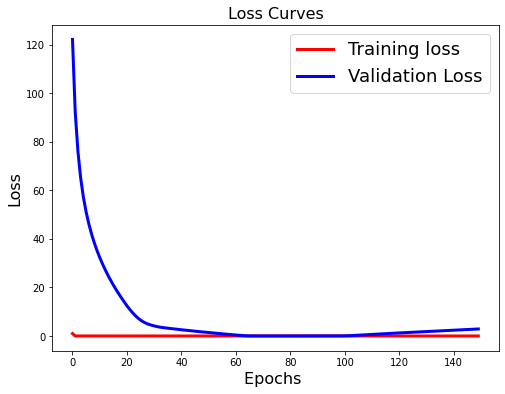

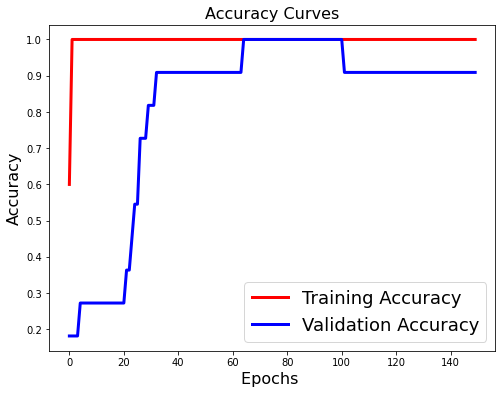

In [0]:
from keras.optimizers import Adagrad
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(224,224,1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=Adagrad(learning_rate=0.001,epsilon=1e-07),metrics=['accuracy'], loss="categorical_crossentropy")
model.summary()

history=model.fit(X_train,y_train,epochs=150,batch_size=32, validation_data=(X_test,y_test))

y_pred=model_aug.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



In [0]:
image="/content/main/dataset/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg"

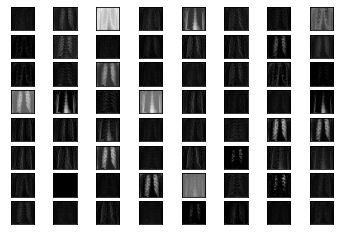

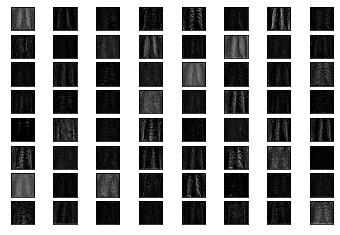

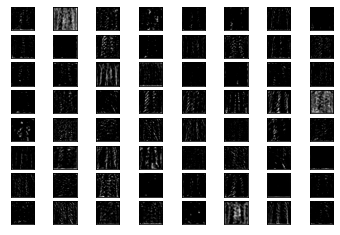

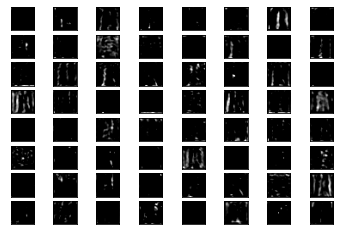

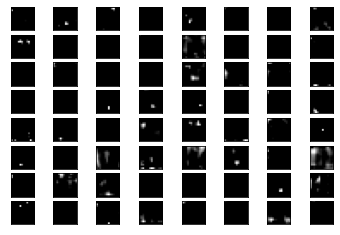

In [155]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img(image, target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	#print("For feature map :", fmap)
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()